# TRAVEAUX DEMANDES

            PRESENTER PAR : TEMADANG SERAPHIN

## 1 - REPRENDRE LA FONCTION train() EN UTILISANT SGD(Stochastic Gradient Descent)

7654
1914
7654
1914
(7654, 4)
(7654,)
(1914, 4)
(1914,)


Text(0, 0.5, 'cost')

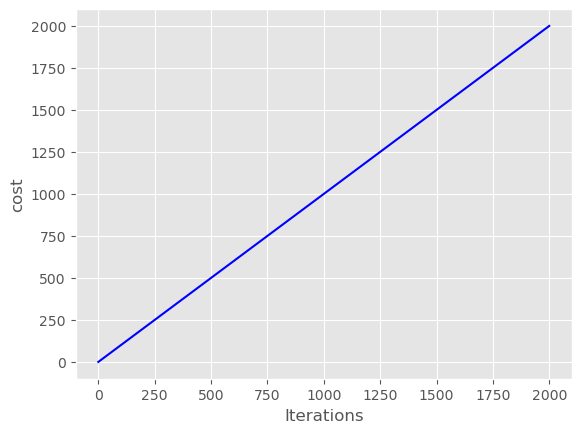

In [82]:
#on import les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('data.xlsx')

data.head()

## On standardise les données pour avoir un truc proche de la distribution normale avec mean 0 (moyenne) et standard deviation 1¶

def standard_feature(data):
  dmean=np.mean(data, axis=0)
  dstd=np.std(data, axis=0)
  data_scaled=(data-dmean)/dstd
  return data_scaled

standard_data=standard_feature(data)

standard_data.head()

data.iloc[:, :-1] = standard_data.iloc[:, :-1]
data.head()

len(data)

## La fonction pour diviser les données (Split data)

def split_data(df, train_percent):
  np.random.seed(0)
  perm=np.random.permutation(df.index)
  n=len(df)

  train_index=int(train_percent*n)
  train=df.iloc[perm[:train_index]]
  test=df.iloc[perm[train_index:]]

  X_train=train.iloc[:, :-1]
  Y_train=train.iloc[:, -1]

  X_test=test.iloc[:, :-1]
  Y_test= test.iloc[:,-1]

  return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test=split_data(data, 0.8)

X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

## Train a Linear Model

def add_ones(X):
  X_new= np.hstack([np.ones((X.shape[0],1)), X])
  return X_new

def compute_cost(X,y, theta):
  loss=(1/len(y))*np.sum((X.dot(theta)-y)**2)
  return loss

def Train(X, y, lr, epoch):
  # Ajouter une colonne de 1 pour le terme d'interception
  X = add_ones(X.values)
  
  # Initialiser les poids avec des zéros
  theta = np.zeros(X.shape[1])
  
  # Initialiser une liste pour stocker les valeurs de coût à chaque itération
  cost_history = np.zeros(epoch)
  
  # Boucle pour effectuer des mises à jour de poids pour chaque époque
  for i in range(epoch):
    # Sélectionner un échantillon aléatoire de la base d'apprentissage
    random_index = np.random.randint(0, len(y))
    x_i = X[random_index]
    y_i = y[random_index]
    
    # Calculer la prédiction et l'erreur pour cet échantillon
    prediction = np.dot(x_i, theta)
    error = prediction - y_i
    
    # Mettre à jour les poids en utilisant la formule de mise à jour de SGD
    theta = theta - lr * x_i * error
    
    # Calculer le coût pour l'ensemble des données et l'ajouter à l'historique des coûts
    cost = compute_cost(X, y, theta)
    cost_history.append(cost)
    
  # Retourner les poids entraînés et l'historique des coûts
  return theta, cost_history

def predict(X,theta):
  X=add_ones(X.values)
  yPred=X@theta

  return yPred

def mse(y, yPred):
  mse=np.square(np.subtract(y,yPred)).mean()

  return mse

#theta, loss_history=Train(X_train, Y_train, 0.000000099, 2000)

#ypred=predict(X_test)
#mse=mse(Y_test, ypred)
#rmse=np.sqrt(mse)
#rmse


epoch=2000
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(epoch), c='blue')
plt.xlabel('Iterations')
plt.ylabel('cost')

   ## 2 -  REPRENDRE CETTE REGESSION LINEAIRE EN UTILISANT SKlearn(Scikit-learn)

RMSE :  4.442262858442491


Text(0, 0.5, 'cost')

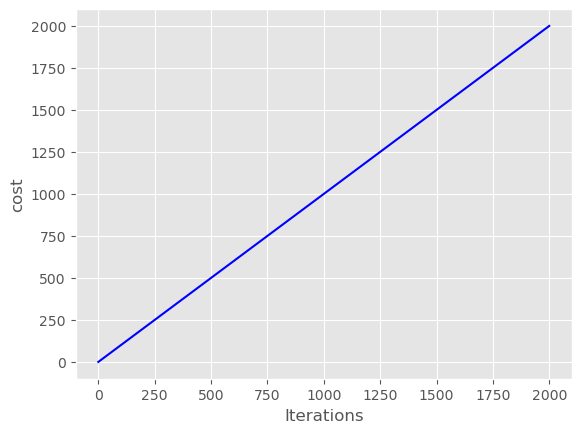

In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Charger les données à partir du fichier Excel
data = pd.read_excel('data.xlsx')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:-1], data.iloc[:, -1], test_size=0.2, random_state=0)

# Créer un objet LinearRegression
lr = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
lr.fit(X_train, Y_train)

# Prédire les valeurs de sortie pour les données de test
Y_pred = lr.predict(X_test)

# Calculer la MSE (erreur quadratique moyenne) entre les valeurs de sortie prédites et les valeurs réelles
mse = mean_squared_error(Y_test, Y_pred)

# Calculer la RMSE (racine carrée de l'erreur quadratique moyenne)
rmse = np.sqrt(mse)

# Afficher la RMSE
print("RMSE : ", rmse)

epoch=2000
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(epoch), c='blue')
plt.xlabel('Iterations')
plt.ylabel('cost')



## 3 - LR(logistic Regression) avec SKlearn

In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Charger les données à partir du fichier CSV
data = pd.read_csv('diabetes.csv')

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:-1], data.iloc[:, -1], test_size=0.2, random_state=0)

# Créer un objet LogisticRegression
lr = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
lr.fit(X_train, Y_train)

# Prédire les valeurs de sortie pour les données de test
Y_pred = lr.predict(X_test)

# Calculer l'accuracy score (taux de réussite) entre les valeurs de sortie prédites et les valeurs réelles
accuracy = accuracy_score(Y_test, Y_pred)

# Afficher l'accuracy score
print("Accuracy : ", accuracy)

Accuracy :  0.8246753246753247


C:\Users\SERAPHIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##  4 - PCA(Principale component Analysis) avec SKlearn

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

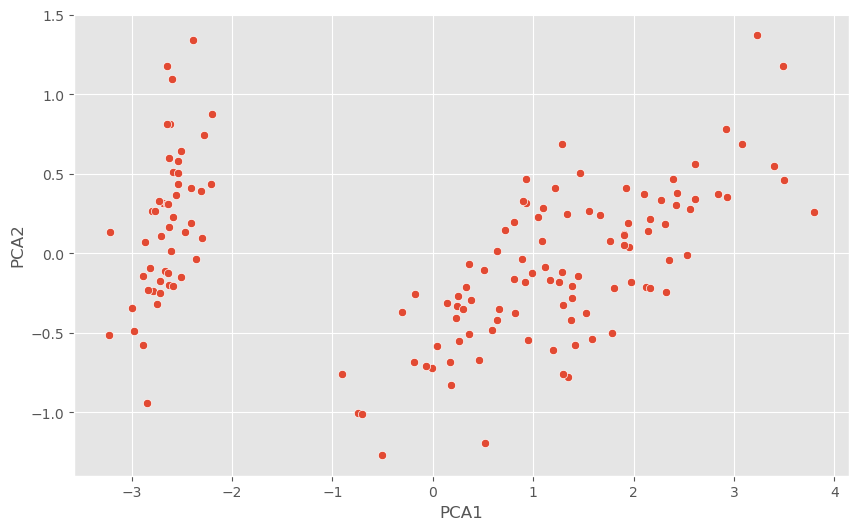

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Charger les données à partir du fichier CSV
data = pd.read_csv('Data.csv')
data

# Créer un objet PCA avec 2 dimensions
pca = PCA(n_components=2)

# Appliquer la PCA sur les données
pca.fit(data)

# Transformer les données en utilisant la PCA
transformed_data = pca.transform(data)

# Créer un nouveau dataframe avec les données transformées
principal_df = pd.DataFrame(transformed_data, columns=['PCA1', 'PCA2'])

# Visualiser les données transformées en utilisant un graphique de dispersion
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.scatterplot(data=principal_df, x='PCA1', y='PCA2')